In [1]:
# prompt: mount to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
path = '/content/drive/MyDrive/KULIAH/smt-5/datamining/assignment-4/data.csv'
df = pd.read_csv(path)
df

,X,Y
0,10499588.23,2018
1,9655653.98,2019
2,9489164.62,2020
3,9618656.81,2020
4,9356445.00,2021
5,9084107.53,2022


In [8]:
productions = df['X']
years = df['Y']

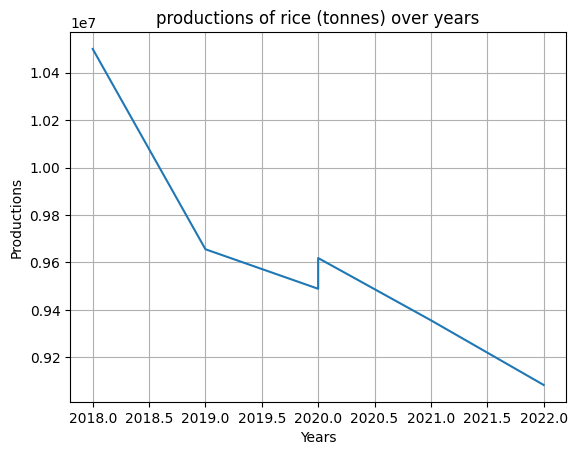

In [6]:
# prompt: create a time series plotting from productions and years array

import matplotlib.pyplot as plt

plt.plot(years, productions)
plt.xlabel('Years')
plt.ylabel('Productions')
plt.title('productions of rice (tonnes) over years')
plt.grid(True)
plt.show()


In [15]:
# prompt: split series named "productions" that has length of 6, into 2 (two )series

x_train = productions[:4]
x_test = productions[4:]

x_train, x_test

(0    10499588.23
 1     9655653.98
 2     9489164.62
 3     9618656.81
 Name: X, dtype: float64,
 4    9356445.00
 5    9084107.53
 Name: X, dtype: float64)

Test RMSE: 367054.151
                            AutoReg Model Results                             
Dep. Variable:                      X   No. Observations:                    4
Model:                     AutoReg(1)   Log Likelihood                 -37.243
Method:               Conditional MLE   S.D. of innovations          59607.062
Date:                Wed, 27 Nov 2024   AIC                             80.487
Time:                        04:36:12   BIC                             77.783
Sample:                             1   HQIC                            75.051
                                    4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.711e+06    7.7e+05     11.319      0.000     7.2e+06    1.02e+07
X.L1           0.0888      0.078      1.141      0.254      -0.064       0.241
                              

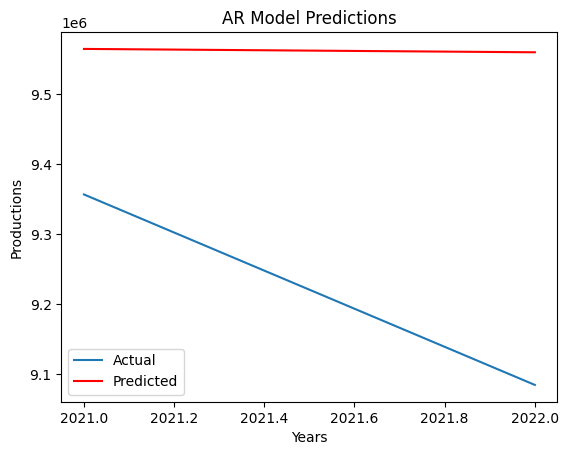

In [16]:
# prompt: build model using auto regression from x_train data

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the AutoRegressive model
model = AutoReg(x_train, lags=1) # You can adjust the lag order
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(x_train), end=len(x_train) + len(x_test) - 1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(x_test, predictions))
print('Test RMSE: %.3f' % rmse)

# Print the model summary
print(model_fit.summary())

# Plot the results
plt.plot(years[4:], x_test, label='Actual')
plt.plot(years[4:], predictions, color='red', label='Predicted')
plt.xlabel('Years')
plt.ylabel('Productions')
plt.title('AR Model Predictions')
plt.legend()
plt.show()